In [2]:
import sys
import os

import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import scipy
import scipy.stats as st
from scipy.optimize import minimize

%matplotlib inline

# Import data

In [8]:
path_data = os.path.join("data", "processed_2.csv")

In [9]:
df = pd.read_csv(path_data, sep=";")

In [10]:
df.dtypes

BETRIEBSTAG            object
FAHRT_BEZEICHNER       object
BETREIBER_ID           object
VERKEHRSMITTEL_TEXT    object
BPUIC                   int64
ANKUNFTSZEIT           object
AN_PROGNOSE            object
ABFAHRTSZEIT           object
AB_PROGNOSE            object
dtype: object

In [11]:
dateparser_ddmmyyy = '%d.%m.%Y'
dateparser_ddmmyyHHMM = '%d.%m.%Y %H:%M'
dateparser_ddmmyyHHMMSS = '%d.%m.%Y %H:%M:%S'

In [12]:
df["BETRIEBSTAG"] = pd.to_datetime(df["BETRIEBSTAG"], format=dateparser_ddmmyyy)
df["ANKUNFTSZEIT"] = pd.to_datetime(df["ANKUNFTSZEIT"], format=dateparser_ddmmyyHHMM)
df["AN_PROGNOSE"] = pd.to_datetime(df["AN_PROGNOSE"], format=dateparser_ddmmyyHHMMSS)
df["ABFAHRTSZEIT"] = pd.to_datetime(df["ABFAHRTSZEIT"], format=dateparser_ddmmyyHHMM)
df["AB_PROGNOSE"] = pd.to_datetime(df["AB_PROGNOSE"], format=dateparser_ddmmyyHHMMSS)

In [15]:
df.dtypes

BETRIEBSTAG            datetime64[ns]
FAHRT_BEZEICHNER               object
BETREIBER_ID                   object
VERKEHRSMITTEL_TEXT            object
BPUIC                           int64
ANKUNFTSZEIT           datetime64[ns]
AN_PROGNOSE            datetime64[ns]
ABFAHRTSZEIT           datetime64[ns]
AB_PROGNOSE            datetime64[ns]
dtype: object

In [16]:
df.head()

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,VERKEHRSMITTEL_TEXT,BPUIC,ANKUNFTSZEIT,AN_PROGNOSE,ABFAHRTSZEIT,AB_PROGNOSE
0,2018-03-10,80:807000:19700:002,80:807000,RB,8503424,2018-03-10 05:54:00,2018-03-10 05:55:40,NaT,NaT
1,2018-03-10,80:807000:19701:001,80:807000,S,8503424,NaT,NaT,2018-03-10 05:28:00,2018-03-10 05:28:56
2,2018-03-10,80:807000:19702:004,80:807000,RB,8503424,2018-03-10 06:24:00,2018-03-10 06:24:49,NaT,NaT
3,2018-03-10,80:807000:19703:005,80:807000,S,8503424,NaT,NaT,2018-03-10 06:07:00,2018-03-10 06:07:35
4,2018-03-10,80:807000:19704:007,80:807000,RB,8503424,2018-03-10 06:54:00,2018-03-10 06:55:39,NaT,NaT


In [17]:
df["VERSPAETUNG_AN"] = df["AN_PROGNOSE"] - df["ANKUNFTSZEIT"]
df["VERSPAETUNG_AB"] = df["AB_PROGNOSE"] - df["ABFAHRTSZEIT"]

In [18]:
df.head()

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,VERKEHRSMITTEL_TEXT,BPUIC,ANKUNFTSZEIT,AN_PROGNOSE,ABFAHRTSZEIT,AB_PROGNOSE,VERSPAETUNG_AN,VERSPAETUNG_AB
0,2018-03-10,80:807000:19700:002,80:807000,RB,8503424,2018-03-10 05:54:00,2018-03-10 05:55:40,NaT,NaT,00:01:40,NaT
1,2018-03-10,80:807000:19701:001,80:807000,S,8503424,NaT,NaT,2018-03-10 05:28:00,2018-03-10 05:28:56,NaT,00:00:56
2,2018-03-10,80:807000:19702:004,80:807000,RB,8503424,2018-03-10 06:24:00,2018-03-10 06:24:49,NaT,NaT,00:00:49,NaT
3,2018-03-10,80:807000:19703:005,80:807000,S,8503424,NaT,NaT,2018-03-10 06:07:00,2018-03-10 06:07:35,NaT,00:00:35
4,2018-03-10,80:807000:19704:007,80:807000,RB,8503424,2018-03-10 06:54:00,2018-03-10 06:55:39,NaT,NaT,00:01:39,NaT


# Overal arrival and departure delay

In [19]:
df_an_versp = df["VERSPAETUNG_AN"].dropna().apply(lambda d: d.total_seconds() / 60.0)

In [20]:
len(df_an_versp)

24970365

In [21]:
left = -2.0
right = 10.00000001
step = 0.25
an_range = np.arange(left, right, step)

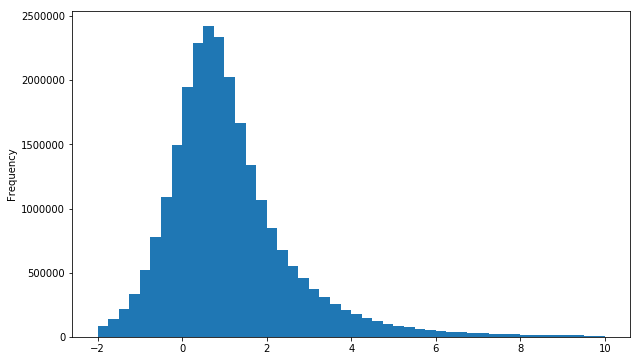

In [22]:
df_an_versp.plot.hist(bins=an_range, figsize=(10, 6))

In [ ]:
df_ab_versp = df["VERSPAETUNG_AB"].dropna().apply(lambda d: d.total_seconds() / 60.0)

In [ ]:
df_ab_versp.head(15)

In [ ]:
len(df_ab_versp)

In [ ]:
ab_range = np.arange(left, right, step)

In [ ]:
df_ab_versp.plot.hist(bins=ab_range, figsize=(10, 6))

# Grouping

In [35]:
df.head()

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,VERKEHRSMITTEL_TEXT,BPUIC,ANKUNFTSZEIT,AN_PROGNOSE,ABFAHRTSZEIT,AB_PROGNOSE,VERSPAETUNG_AN,VERSPAETUNG_AB
0,2018-03-10,80:807000:19700:002,80:807000,RB,8503424,2018-03-10 05:54:00,2018-03-10 05:55:40,NaT,NaT,00:01:40,NaT
1,2018-03-10,80:807000:19701:001,80:807000,S,8503424,NaT,NaT,2018-03-10 05:28:00,2018-03-10 05:28:56,NaT,00:00:56
2,2018-03-10,80:807000:19702:004,80:807000,RB,8503424,2018-03-10 06:24:00,2018-03-10 06:24:49,NaT,NaT,00:00:49,NaT
3,2018-03-10,80:807000:19703:005,80:807000,S,8503424,NaT,NaT,2018-03-10 06:07:00,2018-03-10 06:07:35,NaT,00:00:35
4,2018-03-10,80:807000:19704:007,80:807000,RB,8503424,2018-03-10 06:54:00,2018-03-10 06:55:39,NaT,NaT,00:01:39,NaT


In [49]:
df["TRAIN_ID"] = df["FAHRT_BEZEICHNER"].apply(lambda x: ":".join(x.split(":")[:-1]))

In [50]:
df.head()

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,VERKEHRSMITTEL_TEXT,BPUIC,ANKUNFTSZEIT,AN_PROGNOSE,ABFAHRTSZEIT,AB_PROGNOSE,VERSPAETUNG_AN,VERSPAETUNG_AB,TRAIN_ID
0,2018-03-10,80:807000:19700:002,80:807000,RB,8503424,2018-03-10 05:54:00,2018-03-10 05:55:40,NaT,NaT,00:01:40,NaT,80:807000:19700
1,2018-03-10,80:807000:19701:001,80:807000,S,8503424,NaT,NaT,2018-03-10 05:28:00,2018-03-10 05:28:56,NaT,00:00:56,80:807000:19701
2,2018-03-10,80:807000:19702:004,80:807000,RB,8503424,2018-03-10 06:24:00,2018-03-10 06:24:49,NaT,NaT,00:00:49,NaT,80:807000:19702
3,2018-03-10,80:807000:19703:005,80:807000,S,8503424,NaT,NaT,2018-03-10 06:07:00,2018-03-10 06:07:35,NaT,00:00:35,80:807000:19703
4,2018-03-10,80:807000:19704:007,80:807000,RB,8503424,2018-03-10 06:54:00,2018-03-10 06:55:39,NaT,NaT,00:01:39,NaT,80:807000:19704


In [52]:
df["TRAIN_ARR_ID"] = df["TRAIN_ID"] + df["BPUIC"].apply(lambda x: "_" + str(x))

In [53]:
df.head()

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,VERKEHRSMITTEL_TEXT,BPUIC,ANKUNFTSZEIT,AN_PROGNOSE,ABFAHRTSZEIT,AB_PROGNOSE,VERSPAETUNG_AN,VERSPAETUNG_AB,TRAIN_ID,TRAIN_ARR_ID
0,2018-03-10,80:807000:19700:002,80:807000,RB,8503424,2018-03-10 05:54:00,2018-03-10 05:55:40,NaT,NaT,00:01:40,NaT,80:807000:19700,80:807000:19700_8503424
1,2018-03-10,80:807000:19701:001,80:807000,S,8503424,NaT,NaT,2018-03-10 05:28:00,2018-03-10 05:28:56,NaT,00:00:56,80:807000:19701,80:807000:19701_8503424
2,2018-03-10,80:807000:19702:004,80:807000,RB,8503424,2018-03-10 06:24:00,2018-03-10 06:24:49,NaT,NaT,00:00:49,NaT,80:807000:19702,80:807000:19702_8503424
3,2018-03-10,80:807000:19703:005,80:807000,S,8503424,NaT,NaT,2018-03-10 06:07:00,2018-03-10 06:07:35,NaT,00:00:35,80:807000:19703,80:807000:19703_8503424
4,2018-03-10,80:807000:19704:007,80:807000,RB,8503424,2018-03-10 06:54:00,2018-03-10 06:55:39,NaT,NaT,00:01:39,NaT,80:807000:19704,80:807000:19704_8503424


In [70]:
an_ex = df[(df["TRAIN_ID"] == '80:807000:19702') & (df["BPUIC"] == 8503424)]["VERSPAETUNG_AN"].dropna().apply(lambda d: d.total_seconds() / 60.0)

In [71]:
an_ex

2           0.816667
98768       0.633333
211887      1.800000
325245      1.100000
439117      0.116667
540663      1.216667
654961      1.283333
758964      0.683333
856962      1.550000
968863      0.750000
1082291     1.683333
1195729     1.183333
1309185     2.133333
3001561     0.116667
3106890     0.933333
3225163     2.066667
3343666     4.433333
3462701     0.616667
3581388     0.666667
3701315     0.983333
3813693     0.866667
3919795     1.733333
4044116     0.916667
4168283     1.700000
4293068     1.150000
4417921     0.716667
4542879     2.233333
4659177     0.650000
4765532     1.316667
4881686     1.716667
              ...   
24774771    2.033333
24883357    2.416667
25009858    0.883333
25135662    0.916667
25261640    2.100000
25388359    0.750000
25515404    0.633333
25631661    0.883333
25743775    2.900000
25870627    1.450000
25998627    1.416667
26127573    0.333333
26256299    1.633333
26384791    1.100000
26505202    1.516667
26617969    0.333333
26743930    1

In [58]:
gpd

,,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,VERKEHRSMITTEL_TEXT,ANKUNFTSZEIT,AN_PROGNOSE,ABFAHRTSZEIT,AB_PROGNOSE,VERSPAETUNG_AN,VERSPAETUNG_AB,TRAIN_ARR_ID
TRAIN_ID,BPUIC,,,,,,,,,,,
80:06____:17400,8503424,4,4,4,4,0,0,4,4,0,4,4
80:06____:17404,8503424,5,5,5,5,0,0,5,5,0,5,5
80:06____:17406,8503424,5,5,5,5,0,0,5,5,0,5,5
80:06____:17412,8503424,4,4,4,4,0,0,4,4,0,4,4
80:06____:17416,8503424,5,5,5,5,0,0,5,5,0,5,5
80:06____:19775,8503424,1,1,1,1,0,0,1,1,0,1,1
80:807000:17400,8503424,4,4,4,4,0,0,4,4,0,4,4
80:807000:17401,8503424,5,5,5,5,5,5,0,0,5,0,5
80:807000:17402,8503424,14,14,14,14,0,0,14,14,0,14,14


# Optimization

## Distributions

In [72]:
dist_names_large = [
    'alpha',
    'anglit',
    'arcsine',
    'beta',
    'betaprime',
    'bradford',
    'burr',
    'cauchy',
    'chi',
    'chi2',
    'cosine',
    'dgamma',
    'dweibull',
    'erlang',
    'expon',
    'exponnorm',
    'exponweib',
    'exponpow',
    'f',
    'fatiguelife',
    'fisk',
    'foldcauchy',
    'foldnorm',
    'frechet_r',
    'frechet_l',
    'genlogistic',
    'genpareto',
    'gennorm',
    'genexpon',
    'genextreme',
#     'gausshyper',
    'gamma',
    'gengamma',
    'genhalflogistic',
    'gilbrat',
    'gompertz',
    'gumbel_r',
    'gumbel_l',
    'halfcauchy',
    'halflogistic',
    'halfnorm',
    'halfgennorm',
    'hypsecant',
    'invgamma',
    'invgauss',
    'invweibull',
    'johnsonsb',
    'johnsonsu',
    'ksone',
    'kstwobign',
    'laplace',
    'levy',
    'levy_l',
#     'levy_stable',
    'logistic',
    'loggamma',
    'loglaplace',
    'lognorm',
    'lomax',
    'maxwell',
    'mielke',
    'nakagami',
    'ncx2',
#     'ncf',
    'nct',
    'norm',
    'pareto',
    'pearson3',
    'powerlaw',
    'powerlognorm',
    'powernorm',
#     'rdist',
    'reciprocal',
    'rayleigh',
    'rice',
    'recipinvgauss',
    'semicircular',
    't',
    'triang',
    'truncexpon',
    'truncnorm',
    'tukeylambda',
    'uniform',
    'vonmises',
    'vonmises_line',
    'wald',
    'weibull_min',
    'weibull_max',
    'wrapcauchy',
]

In [73]:
dist_names_small = [
    'norm', 
    'lognorm',
    'weibull_min',
     'weibull_max',
    'alpha',
    'cauchy',
    'powerlognorm',
    'chi',
    'erlang',
    'expon',
    'gamma',
    'gumbel_r',
    'halfcauchy',
    'maxwell',
    'wald',
    'levy',
    'levy_l',
    'pareto',
]


## Definition

In [74]:
def optimize(dist_name, data, opt_type='kst'):
    dist = getattr(scipy.stats, dist_name)
    first_guess = dist.fit(data)
    def fun_eval(act_paras, opt_type=opt_type):
        if opt_type == 'kst':
            d, p = scipy.stats.kstest(data, dist_name, act_paras)
            return d
        elif opt_type == 'cst':
            left = -5.0
            right = 10.0000000000000001
            step = 0.25
            r = np.arange(left, right, step)
            hist_emp = np.histogram(data, r, density=True)[0]
            r_m = np.array([(r[i] + r[i + 1]) / 2.0 for i in range(len(r) - 1)])
            hist_exp = dist.pdf(r_m, *act_paras[:-2], loc=act_paras[-2], scale=act_paras[-1])
            return st.chisquare(hist_emp, f_exp=hist_exp).statistic
        elif opt_type == 'ss':
            left = -5.0
            right = 10.0000000000000001
            step = 0.25
            r = np.arange(left, right, step)
            hist_emp = np.histogram(data, r, density=True)[0]
            r_m = np.array([(r[i] + r[i + 1]) / 2.0 for i in range(len(r) - 1)])
            hist_exp = dist.pdf(r_m, *act_paras[:-2], loc=act_paras[-2], scale=act_paras[-1])
            return np.power(hist_emp - hist_exp, 2.0).sum()
        elif opt_type == 'as':
            left = -5.0
            right = 10.0000000000000001
            step = 0.25
            r = np.arange(left, right, step)
            hist_emp = np.histogram(data, r, density=True)[0]
            r_m = np.array([(r[i] + r[i + 1]) / 2.0 for i in range(len(r) - 1)])
            hist_exp = dist.pdf(r_m, *act_paras[:-2], loc=act_paras[-2], scale=act_paras[-1])
            return np.absolute(hist_emp - hist_exp).sum()
        else:
            raise ValueError("{} is not a valid argument".format(opt_type))
    opt_paras = minimize(fun_eval, first_guess, method='nelder-mead')
    return opt_paras

In [75]:
def evaluate(data, dist_names=dist_names_large, left=left, right=right, step=step, plot_best_n=5):
    # plot data
    x = np.arange(left, right, step)
    y = np.array(data)
    plt.figure(figsize=(13,9))
    h = plt.hist(y, bins=x, color='black', density=False)

    # optimization per distribution
    res_per_dist_name = {}
    for dist_name in dist_names:
        print dist_name
        try:
            res = optimize(dist_name, y, opt_type='as')
            res_per_dist_name[dist_name] = res
            param = res.x
        except Exception as e:
            print "no success: {}".format(e)

    # plot best distributions
    sorted_dist_name_res_pairs = sorted(res_per_dist_name.items(), key=lambda p: p[1].fun)
    x_dist=np.arange(left, right, 0.05)
    for dist_name, res in sorted_dist_name_res_pairs[:plot_best_n]:
            dist = getattr(scipy.stats, dist_name)
            param = res.x
            pdf_fitted = dist.pdf(x_dist, *param[:-2], loc=param[-2], scale=param[-1]) * h[0].sum() * step
            plt.plot(x_dist, pdf_fitted, label="{} {:.4f} {}".format(dist_name, res.fun, res.success))
    plt.xlim(x[0], x[-1])
    plt.legend(loc='upper right')
    plt.show()

## Analysis

In [82]:
def evaluate_arr_train_stop(train_id, bpuic, **kargs):
    data = df[(df["TRAIN_ID"] == train_id) & (df["BPUIC"] == bpuic)]["VERSPAETUNG_AN"].dropna().apply(lambda d: d.total_seconds() / 60.0)
    print len(data)
    evaluate(data, **kargs)

233
alpha
anglit
arcsine
beta
betaprime
bradford
burr
cauchy
chi
chi2
cosine
dgamma
dweibull
erlang
expon
exponnorm
exponweib
exponpow
f
fatiguelife
fisk
foldcauchy
foldnorm
frechet_r


d:\dev\swiss-train-delay-distributions\venv\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
  This is separate from the ipykernel package so we can avoid doing imports until
d:\dev\swiss-train-delay-distributions\venv\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribut

frechet_l
genlogistic
genpareto
gennorm
genexpon
genextreme
gamma
gengamma
genhalflogistic
gilbrat
gompertz
gumbel_r
gumbel_l
halfcauchy
halflogistic
halfnorm
halfgennorm
hypsecant
invgamma
invgauss
invweibull
johnsonsb
johnsonsu
ksone
kstwobign
laplace
levy
levy_l
logistic
loggamma
loglaplace
lognorm
lomax
maxwell
mielke
nakagami
ncx2
nct
norm
pareto
pearson3
powerlaw
powerlognorm
powernorm
reciprocal
rayleigh
rice
recipinvgauss
semicircular
t
triang
truncexpon
truncnorm
tukeylambda
uniform
vonmises
vonmises_line
wald
weibull_min
weibull_max
wrapcauchy


d:\dev\swiss-train-delay-distributions\venv\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.


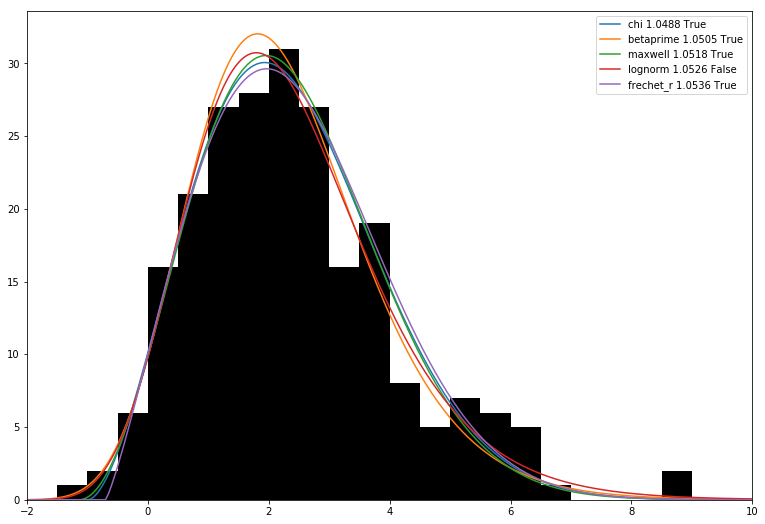

In [91]:
evaluate_arr_train_stop("85:11:2528", 8507000, step=0.5)